# Chi-Square Test

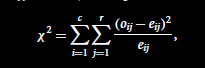

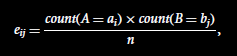

In [3]:
def data_gen():
    list1 = []
    for i in range(300):
        list1.append('male')
    for i in range(1200):
        list1.append('female')
    
    list2 = []
    for i in range(250):
        list2.append('fiction')
    for i in range(50):
        list2.append('non-fiction')
    for i in range(200):
        list2.append('fiction')
    for i in range(1000):
        list2.append('non-fiction')

    data = {
    'Gender' : list1,
    'Preference': list2
    }

    return data 

In [4]:
import pandas as pd 

df = pd.DataFrame(data_gen())
df.head()

,Gender,Preference
0,male,fiction
1,male,fiction
2,male,fiction
3,male,fiction
4,male,fiction


In [5]:
contingency_table = pd.crosstab( df['Preference'], df['Gender'], margins = True)
(contingency_table).head()  

Gender,female,male,All
Preference,,,
fiction,200,250,450
non-fiction,1000,50,1050
All,1200,300,1500


Now we compute the expected frequuencies assuming that there is no relation between these 2 attributtes:
\begin{align*}
\text{Expected frequency} & = e_{ij} \\
\text{Number of samples} & = n \\
\text{Attribute 1} & = A, \quad a_i = \text{ith nominal field} \\
\text{Attribute 2} & = B, \quad b_i = \text{ith nominal field} \\
\\
e_{ij} & = \text{Probability}(A = a_i) \cdot \text{Probability}(B = b_j) \cdot n \\
& = \frac{\text{count}(A = a_i)}{n} \cdot \frac{\text{count}(B = b_j)}{n} \cdot n \\
& = \frac{\text{count}(A = a_i) \cdot \text{count}(B = b_j)}{n}
\end{align*}


In [6]:
def expected_value(contingency_table):
    expected_table = contingency_table.copy()
    for i in contingency_table.index:
        for j in contingency_table.columns:
            expected_table.loc[i,j] = contingency_table.loc['All',j] * contingency_table.loc[i,'All'] / contingency_table.loc['All','All']
    return expected_table

In [7]:
eij = expected_value(contingency_table)
eij.head()

Gender,female,male,All
Preference,,,
fiction,360,90,450
non-fiction,840,210,1050
All,1200,300,1500


In [8]:
def chi_val(contingency_table, expected_table= None):
    if expected_table is None:
        expected_table = expected_value(contingency_table)
    chi_val = 0
    for i in contingency_table.index:
        for j in contingency_table.columns:
            chi_val += ((contingency_table.loc[i,j] - expected_table.loc[i,j])**2)/expected_table.loc[i,j]
    return chi_val

In [9]:
print(chi_val(contingency_table))


507.93650793650795


In [10]:
def get_chi_val(dof = 1, alpha = 0.05):
    from scipy.stats import chi2
    return chi2.isf(alpha, dof)

In [11]:
sig_lvl = get_chi_val(1, 0.001)
print(sig_lvl)

10.827566170662733


In [17]:
def chi_evaluator(contingency_table):
    
    print('Contingency Table: \n', contingency_table)
    rows, columns = contingency_table.shape
    predicted_chi = chi_val(contingency_table)
    print('Comnputed Chi Value: ', predicted_chi)
    
    print('Degrees of Freedom: ', (rows-2)*(columns-2))
    dof = (rows-2)*(columns-2)
    sig_lvl = get_chi_val(dof, 0.001)
    print('Significance Level: ', sig_lvl)
    
    
    if predicted_chi > sig_lvl:
        print('Reject Null Hypothesis')
        return 'Reject Null Hypothesis'
    else:
        print('Fail to Reject Null Hypothesis')
        return 'Fail to Reject Null Hypothesis'

In [18]:
contingency_table = pd.crosstab( df['Preference'], df['Gender'], margins = True)
chi_evaluator(contingency_table)

Contingency Table: 
 Gender       female  male   All
Preference                     
fiction         200   250   450
non-fiction    1000    50  1050
All            1200   300  1500
Comnputed Chi Value:  507.93650793650795
Degrees of Freedom:  1
Significance Level:  10.827566170662733


TypeError: '<' not supported between instances of 'float' and 'function'